<a href="https://colab.research.google.com/github/AzamChatrAzar/neumerical-datasets/blob/main/Deiabet_with_kmean_with_data__bestfeature_and_best_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from seaborn import set_style
set_style('darkgrid')

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#بارگذاری دیتا ست diabetes
diabet=load_diabetes()
data=pd.DataFrame(diabet.data ,columns=diabet.feature_names)
data["target"]=diabet.target



In [3]:
bins = [0, 120, 140, np.inf]
labels = [0, 1, 2]
data['class'] = pd.cut(data['target'], bins=bins, labels=labels)

In [4]:

data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,class
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,2
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,1


In [5]:


X = data.drop(columns=['class', 'target']).values
y = data['class'].values

# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12)




In [6]:
k = int(np.sqrt(len(X_train)))
print(f"تعداد همسایه‌ها (k): {k}")


تعداد همسایه‌ها (k): 19


In [7]:
# Kmean
#پیدا کردن kمناسب با استفده از elbow

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from seaborn import set_style
set_style('darkgrid')

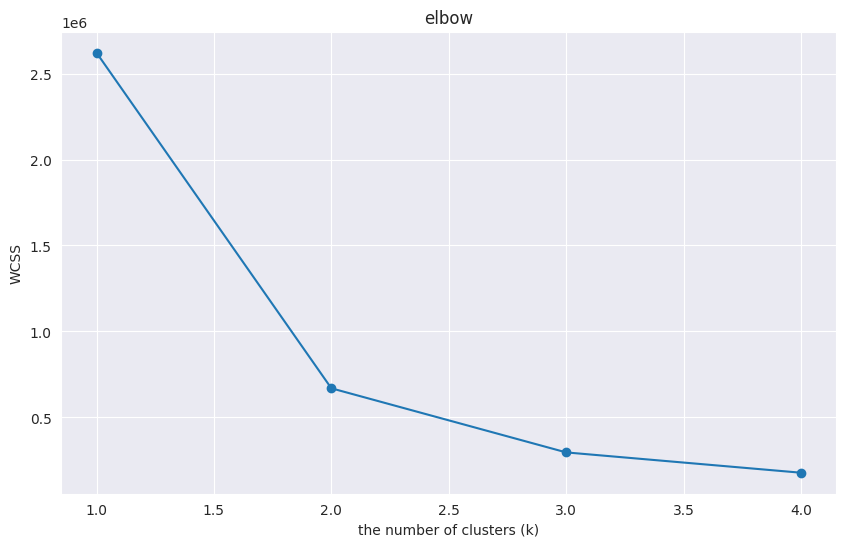

the optimal number of clustters: 3


In [8]:

wcss = []  # مجموع مربعات درون کلاسترها
max_k = 4 # حداکثر تعداد کلاسترها
X1=data.drop(columns=['class']).values
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)  # ذخیره مجموع مربعات درون کلاسترها

# رسم نمودار روش آرنج
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('elbow')
plt.xlabel('the number of clusters (k)')
plt.ylabel('WCSS')
plt.show()



# محاسبه نقطه عطف  به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)

# پیدا کردن نقطه عطف
optimal_k = np.argmin(diff2) + 2  # +2 برای تنظیم ایندکس به تعداد کلاستر


# چاپ تعداد کلاستر بهینه
print(f"the optimal number of clustters: {optimal_k}")





In [9]:
# اضافه کردن برچسب کلاستر به داده‌ها
data['Cluster'] = kmeans.labels_


In [11]:
import seaborn as sns

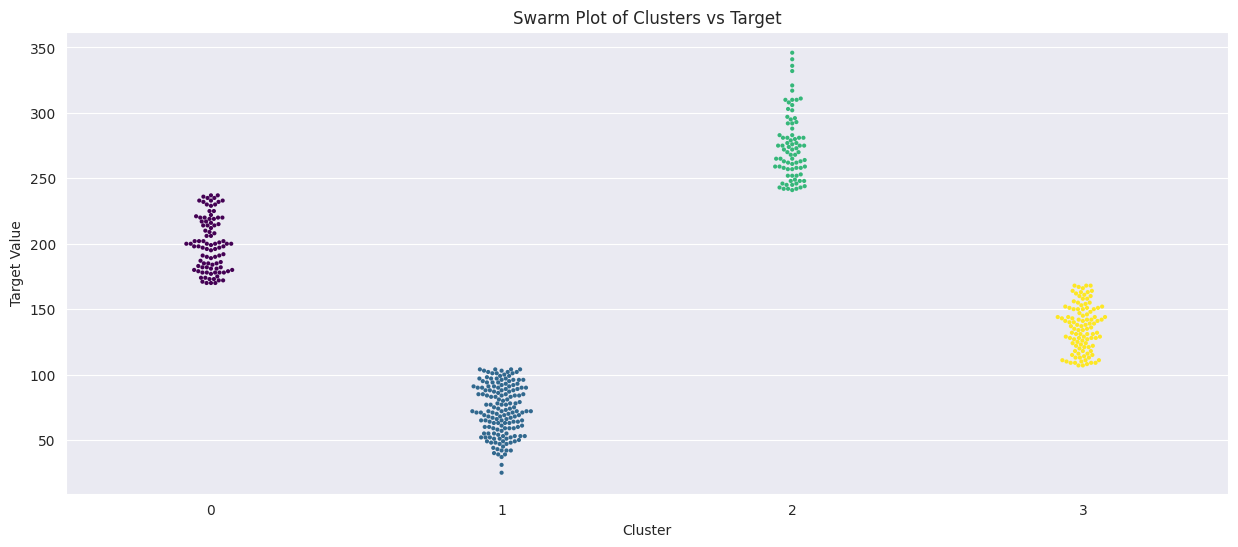

In [12]:
plt.figure(figsize=(15, 6))
sns.swarmplot(
    x='Cluster',
    y='target',
    hue='Cluster',
    data=data,
    palette='viridis',
    legend=False,
    size=3
)
plt.title('Swarm Plot of Clusters vs Target')
plt.xlabel('Cluster')
plt.ylabel('Target Value')
plt.show()

In [13]:
# پیش‌بینی کلاسترها با K-Means
predicted_labels = kmeans.labels_




In [14]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment


In [15]:
# ماتریس درهم‌ریختگی (Confusion Matrix)
cm = confusion_matrix(y, predicted_labels)

# یافتن بهترین نگاشت بین برچسب‌های واقعی و پیش‌بینی‌شده (Hungarian Algorithm)
row_ind, col_ind = linear_sum_assignment(-cm)  # علامت منفی برای ماکزیمم کردن تطابق

# ایجاد یک دیکشنری برای نگاشت برچسب‌ها
label_mapping = {predicted: actual for actual, predicted in zip(row_ind, col_ind)}
print("\nنگاشت برچسب‌های پیش‌بینی‌شده به تارگت اصلی:")
print(label_mapping)

# تبدیل برچسب‌های پیش‌بینی‌شده به تارگت اصلی
adjusted_predicted = np.array([label_mapping[label] for label in predicted_labels])

# مقایسه adjusted_predicted با y برای یافتن داده‌های صحیح
correctly_clustered_mask = (adjusted_predicted == y)

# **حذف داده‌های اشتباه کلاستر شده (فقط نگه‌داشتن داده‌های صحیح)**
filtered_X = X[correctly_clustered_mask]
filtered_y = y[correctly_clustered_mask]

# نمایش نتایج
print(f"\nتعداد کل داده‌ها: {len(X)}")
print(f"تعداد داده‌های صحیح کلاستر شده: {len(filtered_X)}")
print(f"تعداد داده‌های اشتباه کلاستر شده (حذف شده): {len(X) - len(filtered_X)}")



نگاشت برچسب‌های پیش‌بینی‌شده به تارگت اصلی:
{np.int64(1): np.int64(0), np.int64(3): np.int64(1), np.int64(0): np.int64(2), np.int64(2): np.int64(3)}

تعداد کل داده‌ها: 442
تعداد داده‌های صحیح کلاستر شده: 292
تعداد داده‌های اشتباه کلاستر شده (حذف شده): 150


In [18]:

test_sizes = [0.11, 0.13, 0.15, 0.17, 0.19]


# لیست‌های ذخیره نتایج برای روش اول
mse_results_method1 = []
r2_results_method1 = []

# لیست‌های ذخیره نتایج برای روش دوم
mse_results_method2 = []
r2_results_method2 = []

for test_size in test_sizes:
    # تقسیم داده به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(filtered_X,filtered_y, test_size=test_size)
    k = int(np.sqrt(len(X_train)))

    # روش اول: پیش‌بینی جداگانه هر ویژگی
    feature_preds = []
    for i in range(X_test.shape[0]):
        sample_preds = []
        for feature_idx in range(X.shape[1]):
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train[:, feature_idx].reshape(-1, 1), y_train)
            pred = knn.predict(X_test[i, feature_idx].reshape(1, -1))[0]
            sample_preds.append(pred)
        feature_preds.append(sample_preds)

    final_preds = np.mean(feature_preds, axis=1)
    mse_results_method1.append(mean_squared_error(y_test, final_preds))
    r2_results_method1.append(r2_score(y_test, final_preds))

    # روش دوم: KNN رگرسیون معمولی
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=test_size)
    k = int(np.sqrt(len(X_train)))
    knn_regular = KNeighborsRegressor(n_neighbors=k)
    knn_regular.fit(X_train1, y_train1)
    regular_preds = knn_regular.predict(X_test1)
    mse_results_method2.append(mean_squared_error(y_test1, regular_preds))
    r2_results_method2.append(r2_score(y_test1, regular_preds))




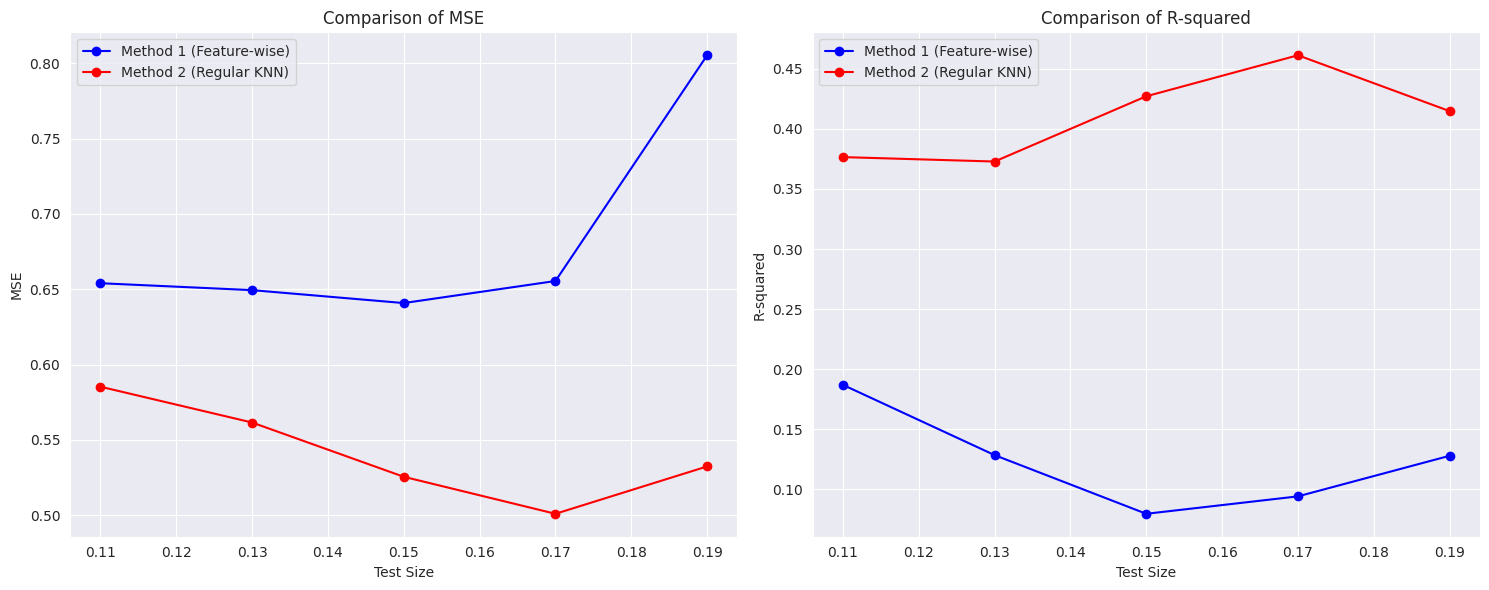

In [19]:
# رسم نمودارها
plt.figure(figsize=(15, 6))

# نمودار مقایسه MSE
plt.subplot(1, 2, 1)
plt.plot(test_sizes, mse_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, mse_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.legend()
plt.grid(True)

# نمودار مقایسه R-squared
plt.subplot(1, 2, 2)
plt.plot(test_sizes, r2_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, r2_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
test_sizes = [0.11, 0.13, 0.15, 0.17, 0.19]

# لیست‌های ذخیره نتایج برای روش اول
mse_results_method1 = []
r2_results_method1 = []

# لیست‌های ذخیره نتایج برای روش دوم
mse_results_method2 = []
r2_results_method2 = []


feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

for test_size in test_sizes:
    print(f"\n--- Evaluating for test_size = {test_size} ---")

    # تقسیم داده به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # روش اول: انتخاب 30% ویژگی‌های برتر و پیش‌بینی با آن‌ها
    feature_scores = []

    # محاسبه دقت هر ویژگی به صورت جداگانه
    for feature_idx in range(X.shape[1]):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train[:, feature_idx].reshape(-1, 1), y_train)
        preds = knn.predict(X_test[:, feature_idx].reshape(-1, 1))
        score = r2_score(y_test, preds)
        feature_scores.append((feature_idx, score))

    # انتخاب 30% ویژگی‌های برتر بر اساس R2-score
    feature_scores.sort(key=lambda x: x[1], reverse=True)
    num_top_features = int(0.30 * X.shape[1])
    top_features = [x[0] for x in feature_scores[:num_top_features]]

    # چاپ ویژگی‌های انتخابی
    print("\nSelected top 30% features:")
    for idx in top_features:
        print(f"{feature_names[idx]} (R2-score: {feature_scores[idx][1]:.4f})")

    # آموزش مدل نهایی روی ویژگی‌های انتخابی
    knn_final = KNeighborsRegressor(n_neighbors=k)
    knn_final.fit(X_train[:, top_features], y_train)
    final_preds = knn_final.predict(X_test[:, top_features])

    mse_results_method1.append(mean_squared_error(y_test, final_preds))
    r2_results_method1.append(r2_score(y_test, final_preds))

    # روش دوم: KNN رگرسیون معمولی (همانند قبل)
    knn_regular = KNeighborsRegressor(n_neighbors=k)
    knn_regular.fit(X_train, y_train)
    regular_preds = knn_regular.predict(X_test)
    mse_results_method2.append(mean_squared_error(y_test, regular_preds))
    r2_results_method2.append(r2_score(y_test, regular_preds))


--- Evaluating for test_size = 0.11 ---

Selected top 30% features:
Feature_3 (R2-score: 0.0182)
Feature_0 (R2-score: 0.0916)
Feature_5 (R2-score: -0.0033)

--- Evaluating for test_size = 0.13 ---

Selected top 30% features:
Feature_2 (R2-score: 0.1494)
Feature_7 (R2-score: -0.1293)
Feature_8 (R2-score: -0.1705)

--- Evaluating for test_size = 0.15 ---

Selected top 30% features:
Feature_8 (R2-score: -0.1055)
Feature_3 (R2-score: 0.0293)
Feature_2 (R2-score: 0.1200)

--- Evaluating for test_size = 0.17 ---

Selected top 30% features:
Feature_2 (R2-score: 0.0803)
Feature_8 (R2-score: -0.0477)
Feature_7 (R2-score: -0.0456)

--- Evaluating for test_size = 0.19 ---

Selected top 30% features:
Feature_8 (R2-score: -0.0629)
Feature_7 (R2-score: -0.0118)
Feature_2 (R2-score: 0.1844)


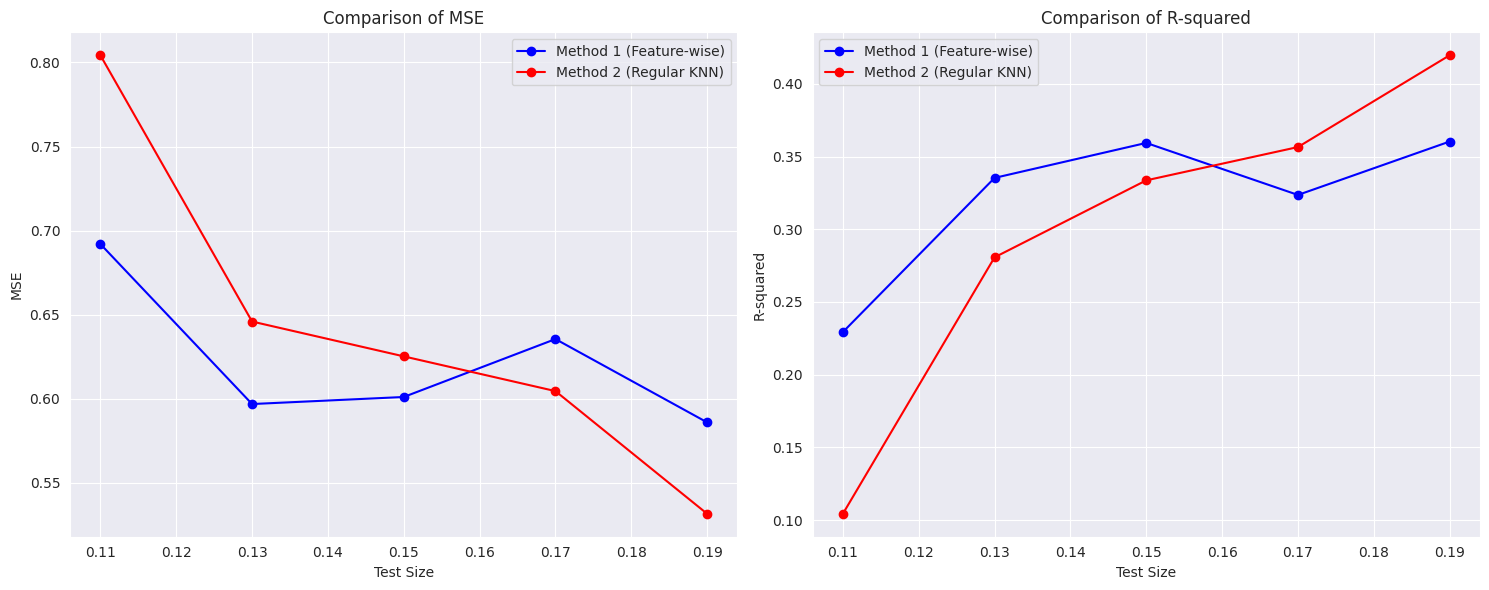

In [21]:
# رسم نمودارها
plt.figure(figsize=(15, 6))

# نمودار مقایسه MSE
plt.subplot(1, 2, 1)
plt.plot(test_sizes, mse_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, mse_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.legend()
plt.grid(True)

# نمودار مقایسه R-squared
plt.subplot(1, 2, 2)
plt.plot(test_sizes, r2_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, r2_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared')
plt.legend()

plt.tight_layout()
plt.show()